# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2381 Дудкин Михаил Валерьевич и Газукина Дарья Денисовна. Вариант №3.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный комплексный гармонический сигнал**:

$s(k) = Ce^{j\omega_0k}, \quad k \in ℕ$

**Дискретный нерекурсивный фильтр**

Для сигнала $x(n),\quad n \in [0, N-1]$ нерекурсивный фильтр в общем виде записывается как $y_n = \sum_{k=0}^{m}c_kx_{n-k}$.

**Дискретный рекурсивный фильтр**

Для сигнала $x(n),\quad n \in [0, N-1]$ нерекурсивный фильтр в общем виде записывается как $y_n = \sum_{k=0}^{p}a_ky_{n-k} + \sum_{k=0}^{m}b_kx_{n-k}$.

**Передаточная функция**

Передаточной функцией фильтра называется функция, показывающая изменение сигнала в зависимости от его частоты:
$y_n = H(\omega) x_n$, или $H(\omega) = \frac{y_n}{x_n}$

Если входной сигнал является гармоническим $x_n = e^{i\omega n}$ то передаточную функцию можно найти решив уравнение
$$H(\omega) x_n = \sum_{k=0}^{p}a_kH(\omega) x_{n-k} + \sum_{k=0}^{m}b_kx_{n-k}$$
относительно $H(\omega)$:

Зависимость передаточной функции от циклической частоты:

$H(2\pi f) = \tilde{H}(f)$

**Численное дифференцирование сигнала**

Задача численного дифференцирования состоит в том, чтобы найти приближенное значение производной $k$-го порядка для данного сигнала по его дискретным отсчетам. Для этого используются различные формулы численного дифференцирования.

Для проверки качества такой формулы полезно знать, как отношение вычисленного значения к истинному зависит от частоты $\omega$.
$Q(\omega) = \frac{d_1}{d}$, где $d$ - истинное значение производной, а $d_1$ - найденное численно.

**Численное интегрирование сигнала**

Задача численного интегрирования состоит в том, чтобы найти приближенное значение итеграла сигнала по его дискретным отсчетам. Для этого используются различные формулы численного интегрирования. Для проверки качества такой формулы полезно знать, как отношение вычисленного значения к истинному зависит от частоты $\omega$.
$Q(\omega) = \frac{I_1}{I}$, где $I$ - истинное значение интеграла, а $I_1$ - найденное численно.

**Дискретное Преобразование Фурье**

Дискретное преобразование Фурье (ДПФ) — это преобразование сигнала, которое позволяет перейти от представления сигнала во временной области к представлению в частотной области.

Пусть дан дискретный сигнал $x(n)$, состоящий из $N$ отсчётов, где $n = 0, 1, 2, \dots, N-1$.

Прямое ДПФ этого сигнала вычисляется по формуле:
$$
X(k) = \sum_{n=0}^{N-1} x(n) \cdot e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \dots, N-1
$$

где:
* $X(k)$ — $k$-й отсчёт спектра сигнала в частотной области (комплексная амплитуда).
* $x(n)$ — $n$-й отсчёт сигнала во временной области.
* $N$ — количество отсчётов в сигнале (длина ДПФ).
* $j$ — мнимая единица ($j^2 = -1$).
* $e^{-j \frac{2\pi}{N} k n}$ — комплексная экспонента, представляющая собой дискретные гармонические колебания с частотой, определяемой индексом $k$.

Результат ДПФ $X(k)$ — это комплексное число, которое показывает амплитуду и фазу синусоидальной составляющей с частотой $\omega_k = \frac{2\pi k}{N}$.



## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Импорт необходимых библиотек

In [255]:
from math import pi, cos, log10
import numpy as np
import matplotlib.pyplot as plt

Подготовим функции для вывода графиков

In [256]:
def signals_plot(signals, labels):
  colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
  time_labels = np.arange(len(signals[0]))
  plt.figure(figsize=(8, 4))
  for i, (signal, title) in enumerate(zip(signals, labels)):
    plt.stem(time_labels, signal, label=labels[i], linefmt=colors[i], markerfmt=".", basefmt=" ")
    plt.title("График дискретных сигналов")
    plt.grid(True)
    plt.xlabel('Отсчеты')
    plt.ylabel('Уровень сигнала')
    plt.legend(fontsize=10)
    plt.tight_layout()
  plt.show()

def func_plot(f, functions, labels, ylabel, title, ylim=None):
  colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
  for i, func in enumerate(functions):
    plt.plot(f, func, label=labels[i], linewidth=2, c=colors[i])
  plt.xlabel('$f$', fontsize=12)
  plt.ylabel(ylabel, fontsize=12)
  plt.title(title, fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.legend(fontsize=10)
  plt.xlim(0, 0.5)
  plt.ylim(ylim)
  plt.show()

def spectrum_plot(spectrums, labels=None, Fs=1):
    colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
    N = len(spectrums[0])
    f = np.arange(0, N // 2 + 1) / N
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    # Амплитудный спектр
    for i, spectrum in enumerate(spectrums):
        amplitude = np.abs(spectrum) / N  # Нормировка
        ax1.stem(f, amplitude[:N // 2 + 1], label=labels[i], linefmt=colors[i], markerfmt=".", basefmt=" ")
    ax1.set_title('Амплитудный спектр сигналов', fontsize=14)
    ax1.set_xlabel('Частота')
    ax1.set_ylabel('Амплитуда')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    # Фазовый спектр
    for i, spectrum in enumerate(spectrums):
        phase = np.angle(spectrum)
        ax2.stem(f, phase[:N // 2 + 1], label=labels[i], linefmt=colors[i], markerfmt=".", basefmt=" ")
    ax2.set_title('Фазовый спектр сигналов', fontsize=14)
    ax2.set_xlabel('Частота')
    ax2.set_ylabel('Фаза (радианы)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos (\omega_k t + \phi_k)$. Частота каждой из гармоник не должна превышать $π$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $π$, изменяющимися с шагом $Δω = 0.1π$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчета $(N = 31)$.

In [257]:
def s(t, A, w, phi):
  res = np.zeros(t.shape)
  for k in range(11):
    res += A[k] * np.cos(w[k] * t + phi[k])
  return res

In [258]:
np.random.seed(243)

w = np.linspace(0, np.pi, 11)
A = np.random.randint(low=1, high=12, size=11)
phi = np.random.rand(11) * 0.5

print('w =', np.round(w, 3))
print('A =', A)
print('phi =', np.round(phi, 3))

w = [0.    0.314 0.628 0.942 1.257 1.571 1.885 2.199 2.513 2.827 3.142]
A = [ 8 10  3  8 11 10  6  5  7  5 10]
phi = [0.366 0.159 0.067 0.408 0.491 0.121 0.212 0.229 0.326 0.408 0.163]


In [259]:
N = 32
continum_t = np.linspace(0, N - 1, 10000)
t = np.arange(0, N)
analog_signal = s(continum_t, A, w, phi)
signal = s(t, A, w, phi)
print(signal)

[ 79.12897225 -11.04751132   3.64963403  -5.15922394  25.39415188
   4.60389885   6.48756647  -9.60203694   8.39032895  -8.8683488
   5.92380405 -12.40996813  11.04740312  -0.65269108  13.20212064
   5.53873053  12.35713221  -2.08415904   7.79075327  15.693042
  79.12897225 -11.04751132   3.64963403  -5.15922394  25.39415188
   4.60389885   6.48756647  -9.60203694   8.39032895  -8.8683488
   5.92380405 -12.40996813]


### Задание 2

Визуализировать исходные аналоговый и дискретизированный сигналы.


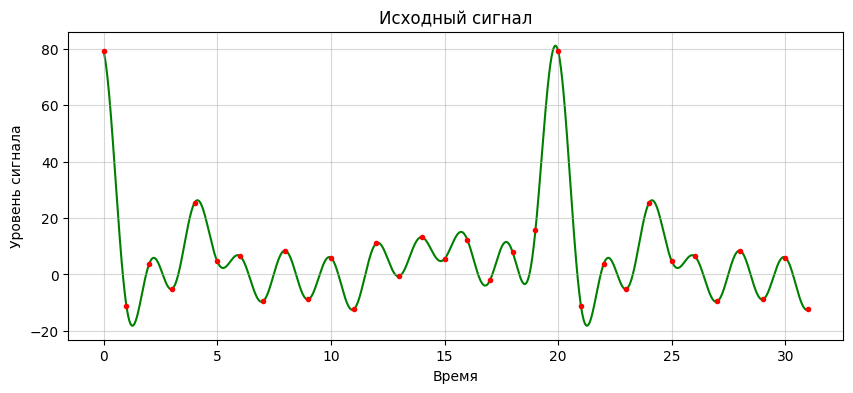

In [260]:
plt.figure(figsize=(10, 4))
plt.plot(continum_t, analog_signal, color='g', zorder=1)
plt.scatter(t, signal, color='r', marker='.', zorder=2)
plt.grid(alpha=0.5)
plt.title("Исходный сигнал")
plt.xlabel("Время")
plt.ylabel("Уровень сигнала")
plt.show()

### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

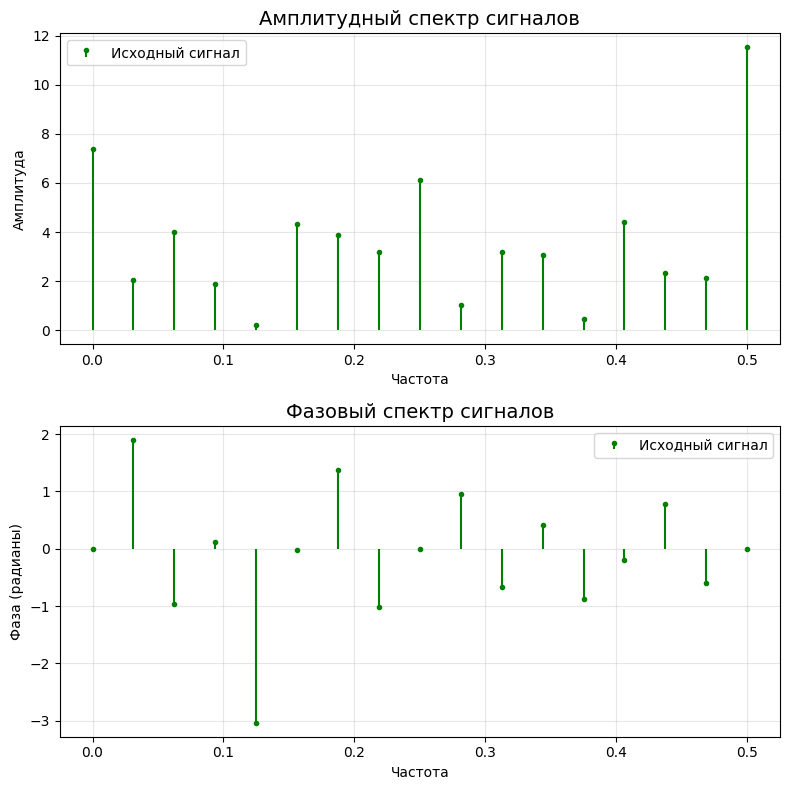

In [261]:
dft_spectrum = np.fft.fft(signal)
spectrum_plot([dft_spectrum], ["Исходный сигнал"])

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [262]:
linear_5 = np.convolve(signal, np.ones(5) / 5, mode='same')
linear_9 = np.convolve(signal, np.ones(9) / 9, mode='same')

Формулы передаточной функции фильтра для линейного сглаживания по $n$ точкам

Для 5 точек $H(\omega) = \frac{1}{5}(1 + 2\cos \omega + 2\cos 2\omega)$

Для 9 точек $H(\omega) = \frac{1}{9}(1 + 2\cos \omega + 2\cos 2\omega + 2\cos 3\omega + 2\cos 4\omega)$

In [263]:
def H_lin(f, n):
  H = np.ones(f.shape)
  for i in range(1, n // 2 + 1):
    H += 2 * np.cos(i * 2 * np.pi * f)
  return H / n

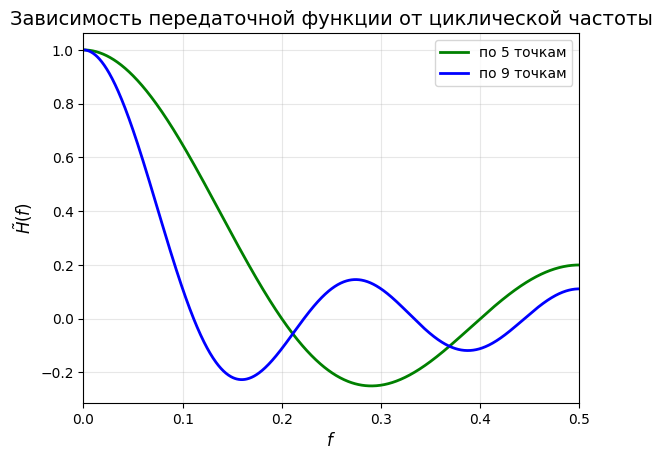

In [264]:
f = np.linspace(0, 0.5, 1000)

H_lin_5 = H_lin(f, 5)
H_lin_9 = H_lin(f, 9)

func_plot(f, [H_lin_5, H_lin_9], ["по 5 точкам", "по 9 точкам"],
          r'$\tilde{H}(f)$', "Зависимость передаточной функции от циклической частоты")

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


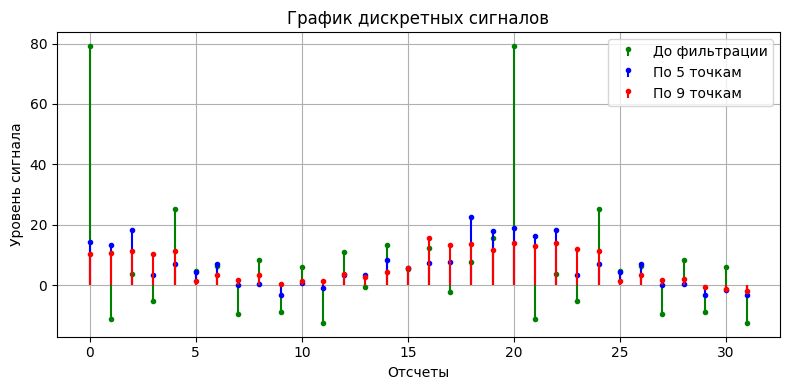

In [265]:
signals_plot([signal, linear_5, linear_9], ["До фильтрации", "По 5 точкам", "По 9 точкам"])

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

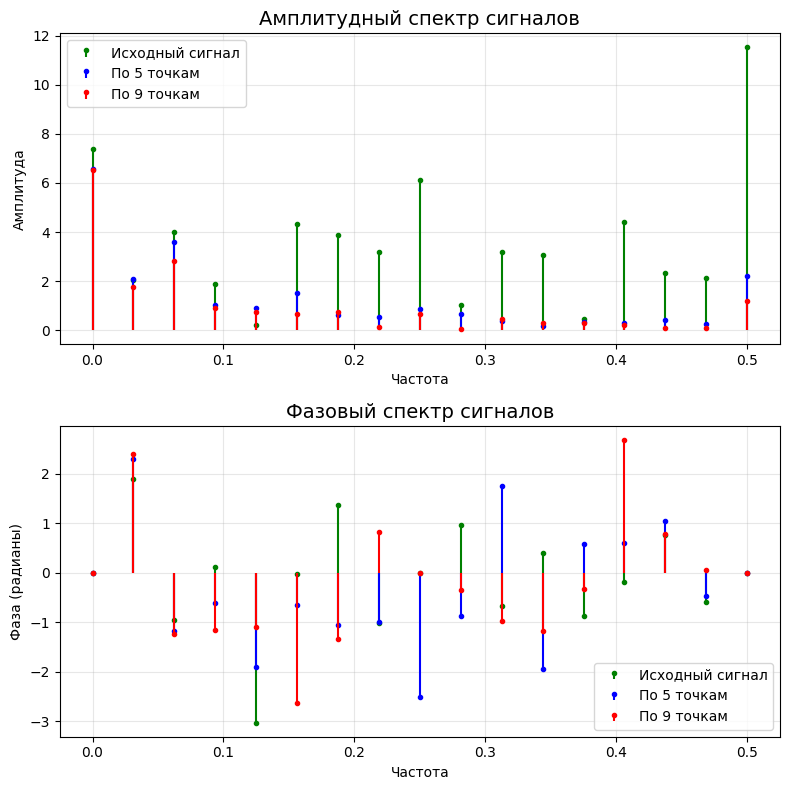

In [266]:
lin_5_spectrum = np.fft.fft(linear_5)
lin_9_spectrum = np.fft.fft(linear_9)
spectrum_plot([dft_spectrum, lin_5_spectrum, lin_9_spectrum], ["Исходный сигнал", "По 5 точкам", "По 9 точкам"])

### Задание 7

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.



Анализ спектров отфильтрованных сигналов показал, что линейные фильтры подавляют высокие частоты и пропускают низкие. Причем чем больше ширина окна, тем уже полоса пропускания фильтра. На графике частотных спектров видно, что фильтр с большим количеством точек сильнее подавляет частоты исходного сигнала. Это согласуется с графиком передаточной функции $\tilde{H}(f)$.

### Задание 8

#### a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.




Для численного нахождения производной первого порядка используется следующий нерекурсивный фильтр:

$$y_n = \frac{1}{2}(x_{n + 1} - x_{n - 1})$$

Для гармонического сигнала $x_n = e^{i\omega n}$ производная равна $x'_n = i\omega e^{i\omega n}$. А если применить фильтр, то численная производная будет равна:

$$y_n = \frac{1}{2}(e^{i\omega} - e^{-i\omega}) e^{i\omega n} = i\sin \omega \cdot e^{i\omega n}$$

Отношение численной производной к истинной будет равно:

$$Q(\omega) = \frac{i\sin \omega \cdot e^{i\omega n}}{i\omega e^{i\omega n}} = \frac{\sin \omega}{\omega}$$

In [267]:
def derivative_s(t, A, w, phi):
  result = np.zeros(t.shape)
  for k in range(11):
    result += - w[k] * A[k] * np.sin(w[k] * t + phi[k])
  return result

In [268]:
deriv_kernel = np.array([1, 0, -1]) / 2  # ядро для центральных разностей
numeric_deriv_s = np.convolve(signal, deriv_kernel, mode='same')
deriv_s = derivative_s(continum_t, A, w, phi)

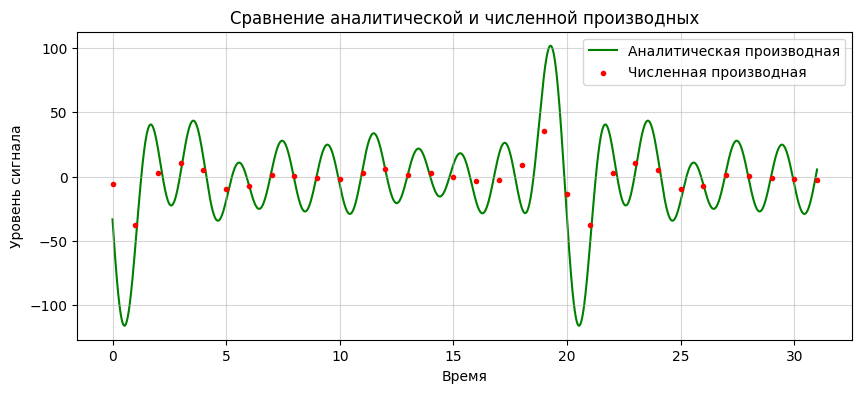

In [269]:
plt.figure(figsize=(10, 4))
plt.plot(continum_t, deriv_s, color='g', zorder=1, label='Аналитическая производная')
plt.scatter(t, numeric_deriv_s, color='r', marker='.', zorder=2, label='Численная производная')
plt.grid(alpha=0.5)
plt.title("Сравнение аналитической и численной производных")
plt.xlabel("Время")
plt.ylabel("Уровень сигнала")
plt.legend()
plt.show()

In [270]:
def Q_deriv(f):
  w = 2 * np.pi * f
  return np.sin(w) / w

/tmp/ipython-input-3469162660.py:3: RuntimeWarning: invalid value encountered in divide
  return np.sin(w) / w


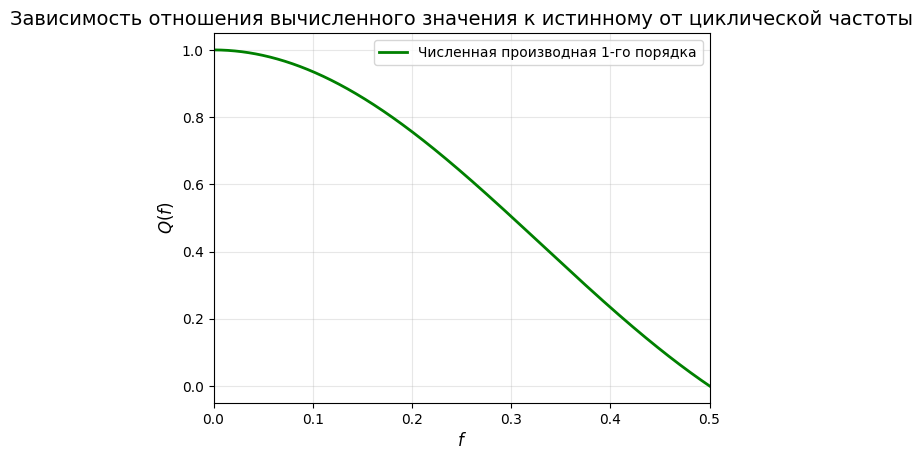

In [271]:
f = np.linspace(0, 0.5, 1000)
Q_deriv_s = Q_deriv(f)
func_plot(f, [Q_deriv_s], ["Численная производная 1-го порядка"],
          r"$Q(f)$", "Зависимость отношения вычисленного значения к истинному от циклической частоты")

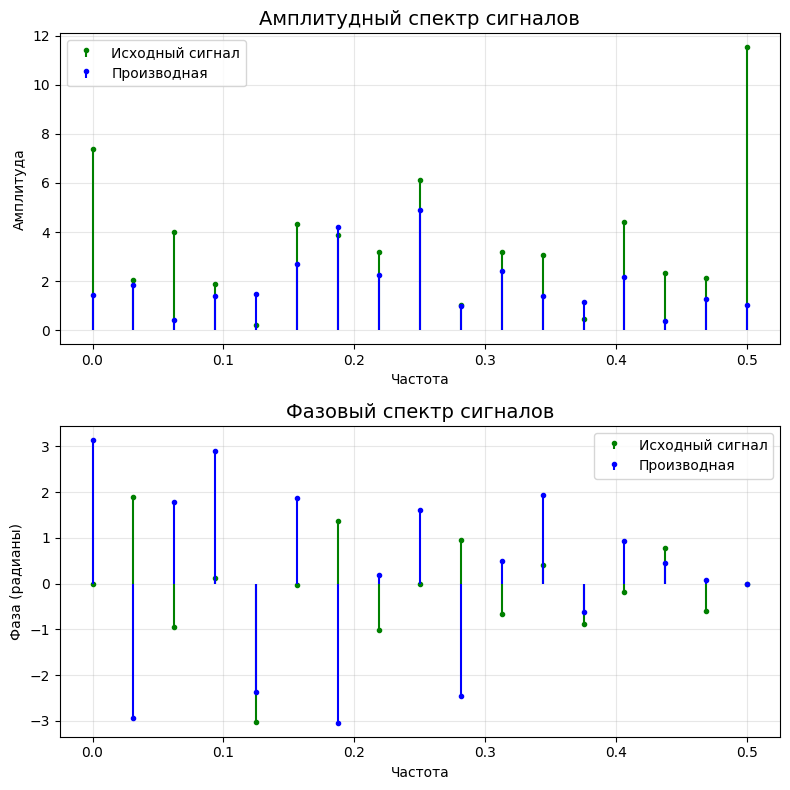

In [272]:
deriv_spectrum = np.fft.fft(numeric_deriv_s)
spectrum_plot([dft_spectrum, deriv_spectrum], ["Исходный сигнал", "Производная"])

График аналитической производной и отсчеты численной произвводной довольно сильно отличаются. Данный фильтр не способен уловить быстрые колебания сигнала, поэтому для сигнала, содержащего высокие частоты производная будет иметь большое расхождения с аналитической. Такие выводы согласуются с графиком отношения численной и аналитической производных. Данный фильтр дает приближенный значения производной для низкочастотных сигналов, а высокочастотную составляющую он игнорирует.

#### b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).


**Формула прямоугольников**

Квадратурной формуле прямоугольников соответствует рекурсивный фильтр $y_{n+1} = y_{n} + x_{n + 1/2}$. Это линейное преобразование, а значит отклик на гармонический сигнал $x_n = e^{i\omega n}$ следует искать в виде $y_n = H(\omega) e^{i\omega n}$.

$$H(\omega) e^{i\omega (n+1)} = H(\omega) e^{i\omega n} + e^{i\omega (n + 1/2)}$$

$$H(\omega) = \frac{e^{i\omega (n + 1/2)}}{e^{i\omega (n+1)} - e^{i\omega n}} = \frac{e^{i\omega /2}}{e^{i\omega} - 1} $$

Разделим числитель и знаменатель на $e^{i\omega /2}$ и получим:

$$H(\omega) = \frac{e^{i\omega n / 2}}{e^{i\omega n / 2} - e^{-i\omega n / 2}} = \frac{1}{2i\sin \omega / 2}$$


Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = \frac{i\omega}{2i\sin \omega / 2} = \frac{\omega / 2}{\sin \omega / 2} $$

**Формула трапеций**

Квадратурной формуле трапеций соответствует рекурсивный фильтр $y_{n+1} = y_{n} + \frac{1}{2}(x_n + x_{n+1})$. Это линейное преобразование, а значит отклик на гармонический сигнал $x_n = e^{i\omega n}$ следует искать в виде $y_n = H(\omega) e^{i\omega n}$.

$$H(\omega) e^{i\omega (n+1)} = H(\omega) e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega (n+1)})$$

$$H(\omega) = \frac{1}{2}\frac{e^{i\omega n} + e^{i\omega (n+1)}}{e^{i\omega (n+1)} - e^{i\omega n}} = \frac{1}{2}\frac{1 + e^{i\omega}}{e^{i\omega} - 1} $$

Разделим числитель и знаменатель на $e^{i\omega /2}$ и получим:

$$H(\omega) = \frac{1}{2}\frac{e^{i\omega n / 2} + e^{-i\omega n / 2}}{e^{i\omega n / 2} - e^{-i\omega n / 2}} = \frac{\cos \omega / 2}{2i\sin \omega / 2}$$


Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = \frac{i\omega \cos \omega / 2}{2i\sin \omega / 2} = \cos \omega / 2 \frac{\omega / 2}{\sin \omega / 2} $$

**Формула Симпсона**

Квадратурной формуле трапеций соответствует рекурсивный фильтр $y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$. Это линейное преобразование, а значит отклик на гармонический сигнал $x_n = e^{i\omega n}$ следует искать в виде $y_n = H(\omega) e^{i\omega n}$.

$$H(\omega) e^{i\omega (n+1)} = H(\omega) e^{i\omega (n-1)} + \frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)})$$

$$H(\omega) = \frac{1}{3}\frac{e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)}}{e^{i\omega (n+1)} - e^{i\omega (n-1)}} = \frac{1}{3}\frac{e^{-i\omega}  + 4 + e^{i\omega}}{e^{i\omega} - e^{-i\omega}} = \frac{2 + \cos \omega}{3i\sin \omega} $$

Истинное значение интеграла $e^{i\omega n}$ равно $\frac{e^{i\omega n}}{i\omega}$. Найдем отношение численного значения к истинному:

$$Q(\omega) = i\omega\frac{2 + \cos \omega}{3i\sin \omega} = \omega\frac{2 + \cos \omega}{3\sin \omega} $$

In [273]:
def integral_s(t, A, w, phi):
  result = A[0] * np.ones_like(t, dtype=np.float64)
  for k in range(1, 11):
    result += A[k] * np.sin(w[k] * t + phi[k]) / w[k]
  return result

In [274]:
rect_int = np.zeros_like(signal)
rect_int[1:] = np.cumsum((signal[1:]))

In [275]:
trap_int = np.zeros_like(signal)
for i in range(len(signal)-1):
    trap_int[i+1] = trap_int[i] + (signal[i] + signal[i+1]) / 2

In [276]:
simpson_int = np.zeros_like(signal)
simpson_int[1] = (signal[0] + signal[1]) / 2
simpson_int[2:] = (signal[:-2] + 4*signal[1:-1] + signal[2:]) / 3
simpson_int = np.cumsum(simpson_int)

In [277]:
integral = integral_s(continum_t, A, w, phi)

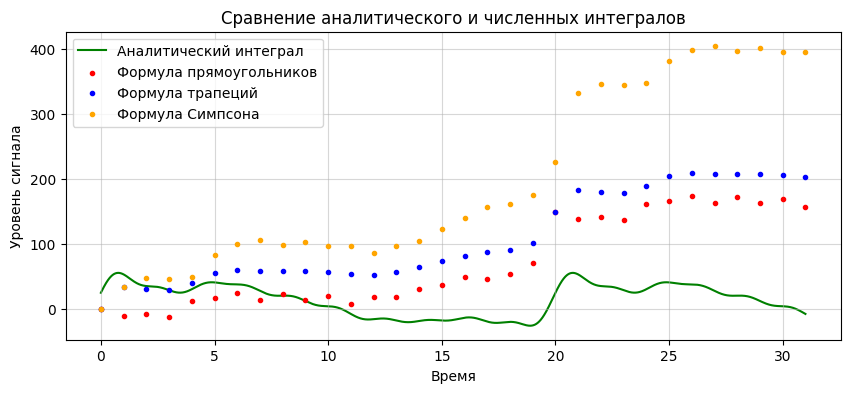

In [278]:
plt.figure(figsize=(10, 4))
plt.plot(continum_t, integral, color='g', zorder=1, label='Аналитический интеграл')
plt.scatter(t, rect_int, color='r', marker='.', zorder=2, label='Формула прямоугольников')
plt.scatter(t, trap_int, color='b', marker='.', zorder=2, label='Формула трапеций')
plt.scatter(t, simpson_int, color='orange', marker='.', zorder=2, label='Формула Симпсона')
plt.grid(alpha=0.5)
plt.title("Сравнение аналитического и численных интегралов")
plt.xlabel("Время")
plt.ylabel("Уровень сигнала")
plt.legend()
plt.show()

In [279]:
def Q_rect(f):
  return np.pi * f / (np.sin(np.pi * f))

def Q_trapezoid(f):
  return np.cos(np.pi * f) * np.pi * f / (np.sin(np.pi * f))

def Q_Simpson(f):
  return 2 * np.pi * f * (2 + np.cos(2 * np.pi * f)) / (3 * np.sin(2 * np.pi * f))

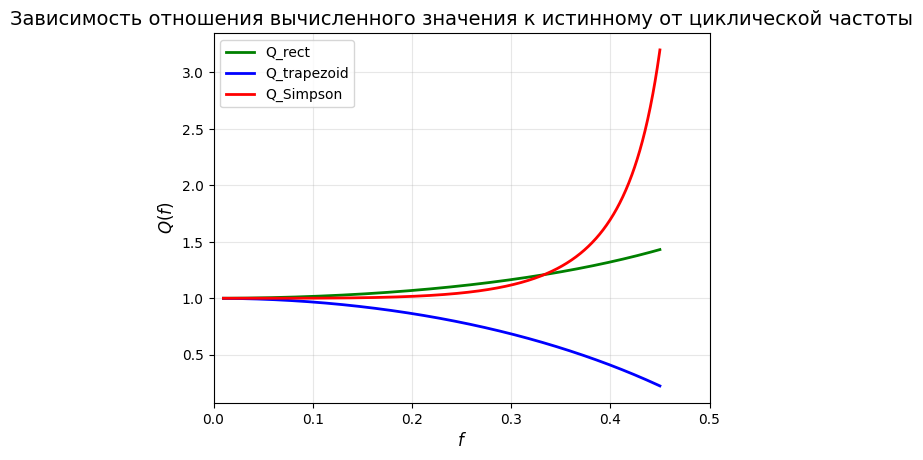

In [280]:
f = np.linspace(0.01, 0.45, 1000)

Q_functions = [Q_rect(f), Q_trapezoid(f), Q_Simpson(f)]
Q_titles = ["Q_rect", "Q_trapezoid", "Q_Simpson"]

func_plot(f, Q_functions, Q_titles, r"$Q(f)$", "Зависимость отношения вычисленного значения к истинному от циклической частоты")

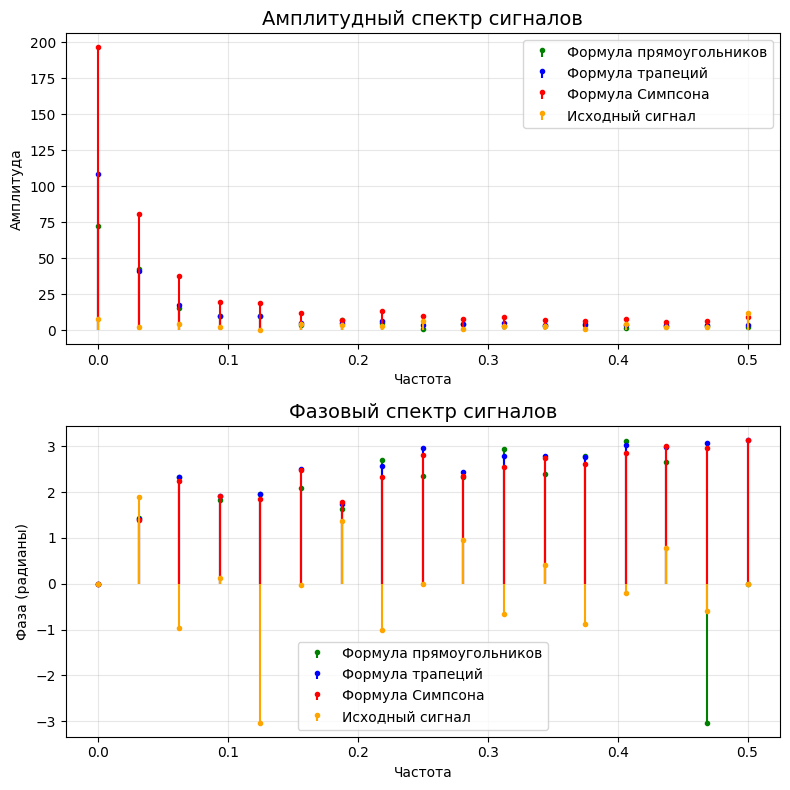

In [282]:
integral = integral_s(t, A, w, phi)
int_spectrum = np.fft.fft(integral)
rect_spectrum = np.fft.fft(rect_int)
trap_spectrum = np.fft.fft(trap_int)
simpson_spectrum = np.fft.fft(simpson_int)
spectrum_plot([rect_spectrum, trap_spectrum, simpson_spectrum, dft_spectrum],
              ["Формула прямоугольников", "Формула трапеций", "Формула Симпсона", "Исходный сигнал"])

Сравнивая график интеграла сигнала, полученного аналитически с отсчетами сигналов, полученных численным интегрированием, можно сделать следующие выводы:
* формулы для вычисления интеграла сильно завышают значения интеграла. Это происходит из-за того, что в сигнале присутствуют гармоники высокой частоты, которые усиливаются фильтрами, особенно фильтром, полученным на основе формулы Симпсона.
* Из-за того, что численные формулы дали результат, сильно отличающийся от истины, на графике амплитудного спектра преобладают низкие частоты, причем завышенные более чем в 10 раз. Эта картина не соответствует графикам передаточных функций Q(f) из-за того, что в сигнале присутствуют высокочастотные составляющие

## Выводы

В ходе выполнения работы было подтверждено, что фильтры на основе численного дифференцирования эффективно выделяют высокочастотные компоненты сигнала, подавляя постоянную составляющую, что соответствует их дифференцирующим свойствам. Формулы численного интегрирования, напротив, демонстрируют хорошие результаты на низких частотах, успешно сглаживая сигнал и подавляя высокочастотные помехи. Однако с ростом частоты приближающейся к π, эти методы интегрирования начинают давать существенно искаженные результаты, так как их частотные характеристики не являются идеальными интеграторами на всем диапазоне. Линейное сглаживание показало себя как эффективный фильтр низких частот, причем увеличение количества точек в окне ведет к более сильному подавлению высоких частот. Анализ спектров с помощью ДПФ наглядно продемонстрировал, как каждый фильтр преобразует исходный сигнал в частотной области, что полностью соответствует теоретическим расчетам их передаточных функций. Таким образом, практическая работа позволила наглядно исследовать и подтвердить основные свойства рекурсивных фильтров, построенных на простейших численных методах, и их ограничения, особенно заметные для операций интегрирования в высокочастотной области.